In [1]:
from notebook_setup.with_matplotlib import *
init_nb()
toggle_code_button()

In [66]:
width = 20
delta = 0.01
x = np.arange(-width/2., +width/2., delta)
y = np.arange(-width/2., +width/2., delta)
X, Y = np.meshgrid(x, y)

R = 1
kappa = 0.5
NP = (X**2 + Y**2) < R**2
r = np.sqrt(X**2 + Y**2)
temp = np.exp(-r/kappa)
temp[NP] = 1

[]

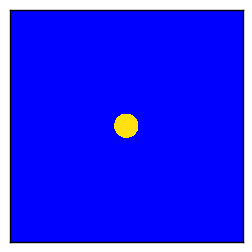

In [60]:
plt.figure(figsize=(3,3))
blue = '#0000ff'
yellow = '#ffe010'
plt.contourf(X, Y, NP, colors=(blue, yellow, yellow, yellow, yellow))
a = plt.gca()
a.set_aspect(1)
a.set_xticks([])
a.set_yticks([])

[]

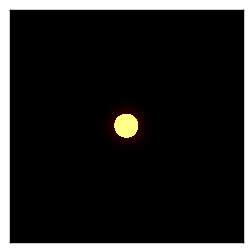

In [67]:
plt.figure(figsize=(3,3))
plt.contourf(X, Y, temp, 100, cmap='afmhot', vmax=1.3)
a = plt.gca()
a.set_aspect(1)
a.set_xticks([])
a.set_yticks([])

In [69]:
for i, kappa in enumerate(np.arange(0.1, 5, 0.1)):
    temp = np.exp(-r/kappa)
    temp[NP] = 1
    f = plt.figure(figsize=(3,3))
    plt.contourf(X, Y, temp, 100, cmap='afmhot', vmax=1.3)
    a = plt.gca()
    a.set_aspect(1)
    a.set_xticks([])
    a.set_yticks([])
    plt.tight_layout()
    plt.savefig('out/photothermal_movie/frame{:02d}.png'.format(i))
    plt.close(f)
    

In [71]:
import iapws

In [95]:
T_Celsius = np.arange(20, 81)
T_kelvin = T_Celsius + scipy.constants.zero_Celsius
atm_MPa = scipy.constants.atmosphere*1e-6
water_n = np.array([iapws.IAPWS95(P=atm_MPa, T=temp).n for temp in T_kelvin])

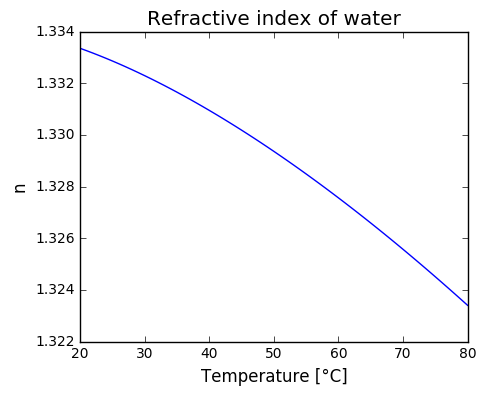

In [98]:
plt.figure(figsize=(5,4))
plt.plot(T_Celsius, water_n)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Temperature [°C]')
plt.ylabel('n')
plt.title('Refractive index of water')
plt.savefig('out/n_water.pdf')

1.3343059820982217

In [75]:
water